<a href="https://colab.research.google.com/github/Lokeshwaran2975/Plant-Disease-Detection-from-Leaf-Images/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
folder_path = 'PlantVillage'
classes = os.listdir(folder_path)
num_classes = len(classes)
print("Number of classes:", num_classes)
print(classes)

Number of classes: 18
['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'train', 'val']


In [ ]:
class_counts = {}
dataset_path = 'PlantVillage'
class_folders = os.listdir(dataset_path)
for class_name in class_folders:
    class_folder_path = os.path.join(dataset_path, class_name)
    class_counts[class_name] = len(os.listdir(class_folder_path))

# Print the number of images per class
for class_name, count in class_counts.items():
    print(f"Class {class_name}: {count} images")

Class Pepper__bell___Bacterial_spot: 997 images
Class Pepper__bell___healthy: 1478 images
Class PlantVillage: 15 images
Class Potato___Early_blight: 1000 images
Class Potato___healthy: 152 images
Class Potato___Late_blight: 1000 images
Class Tomato_Bacterial_spot: 2127 images
Class Tomato_Early_blight: 1000 images
Class Tomato_healthy: 1591 images
Class Tomato_Late_blight: 1909 images
Class Tomato_Leaf_Mold: 952 images
Class Tomato_Septoria_leaf_spot: 1771 images
Class Tomato_Spider_mites_Two_spotted_spider_mite: 1676 images
Class Tomato__Target_Spot: 1404 images
Class Tomato__Tomato_mosaic_virus: 373 images
Class Tomato__Tomato_YellowLeaf__Curl_Virus: 3209 images
Class train: 18 images
Class val: 18 images


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

dataset_path = 'PlantVillage'
output_path = 'split_dataset'  # Output directory

# Parameters
test_size = 0.2  # 20% for test set
val_size = 0.2   # 20% of the remaining 80% for validation

# Function to copy files
def copy_files(files, source, dest):
    os.makedirs(dest, exist_ok=True)
    for file in files:
        file_path = os.path.join(source, file)
        if os.path.isfile(file_path):
            shutil.copy(file_path, dest)

# Create output structure
os.makedirs(output_path, exist_ok=True)

classes = os.listdir(dataset_path)

for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

    if len(images) == 0:
        print(f"Skipping '{class_name}' (no images found)")
        continue

    train_val, test = train_test_split(images, test_size=test_size, random_state=42)

    if len(train_val) == 0:
        print(f"Not enough images in '{class_name}' to split. Skipping...")
        continue

    train, val = train_test_split(train_val, test_size=val_size, random_state=42)

    for dataset_type, dataset_files in zip(['train', 'val', 'test'], [train, val, test]):
        dest_path = os.path.join(output_path, dataset_type, class_name)
        copy_files(dataset_files, class_path, dest_path)

print("Dataset successfully split into training, validation, and test sets.")


Skipping 'PlantVillage' (no images found)
Skipping 'train' (no images found)
Skipping 'val' (no images found)
Dataset successfully split into training, validation, and test sets.


In [ ]:
# Preprocessing Images by ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_dir = 'split_dataset/train'
validation_data_dir = 'split_dataset/val'


batch_size = 32
img_width, img_height = 224, 224

# Training data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

# Validation data should not be augmented
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Flow validation images in batches
validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 13197 images belonging to 15 classes.
Found 3307 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Model parameters
num_classes = 15
# img_width, img_height = 256, 256

# Initialize the model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(2, 2))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Fourth Convoltional Layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flattening
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

# Dropout to prevent overfitting
model.add(Dropout(0.3))
# Output Layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,895,503 (37.75 MB)

 Trainable params: 9,895,503 (37.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 25

historyCNN = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/25
412/412 ━━━━━━━━━━━━━━━━━━━━ 958s 2s/step - accuracy: 0.9355 - loss: 0.1912 - val_accuracy: 0.9618 - val_loss: 0.1100
Epoch 2/25
  1/412 ━━━━━━━━━━━━━━━━━━━━ 14:06 2s/step - accuracy: 0.9062 - loss: 0.2575

d:\elevate labs\tfenv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


412/412 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - accuracy: 0.9062 - loss: 0.2575 - val_accuracy: 0.9657 - val_loss: 0.1013
Epoch 3/25
412/412 ━━━━━━━━━━━━━━━━━━━━ 872s 2s/step - accuracy: 0.9353 - loss: 0.1851 - val_accuracy: 0.9609 - val_loss: 0.1190
Epoch 4/25
412/412 ━━━━━━━━━━━━━━━━━━━━ 43s 99ms/step - accuracy: 0.9375 - loss: 0.1410 - val_accuracy: 0.9542 - val_loss: 0.1345
Epoch 5/25
412/412 ━━━━━━━━━━━━━━━━━━━━ 878s 2s/step - accuracy: 0.9423 - loss: 0.1717 - val_accuracy: 0.9421 - val_loss: 0.1964
Epoch 6/25
412/412 ━━━━━━━━━━━━━━━━━━━━ 45s 104ms/step - accuracy: 0.9688 - loss: 0.1726 - val_accuracy: 0.9445 - val_loss: 0.1926
Epoch 7/25
412/412 ━━━━━━━━━━━━━━━━━━━━ 947s 2s/step - accuracy: 0.9483 - loss: 0.1525 - val_accuracy: 0.9590 - val_loss: 0.1109
Epoch 8/25
412/412 ━━━━━━━━━━━━━━━━━━━━ 49s 113ms/step - accuracy: 0.9062 - loss: 0.1904 - val_accuracy: 0.9633 - val_loss: 0.1021
Epoch 9/25
412/412 ━━━━━━━━━━━━━━━━━━━━ 996s 2s/step - accuracy: 0.9458 - loss: 0.1546 - val_accuracy

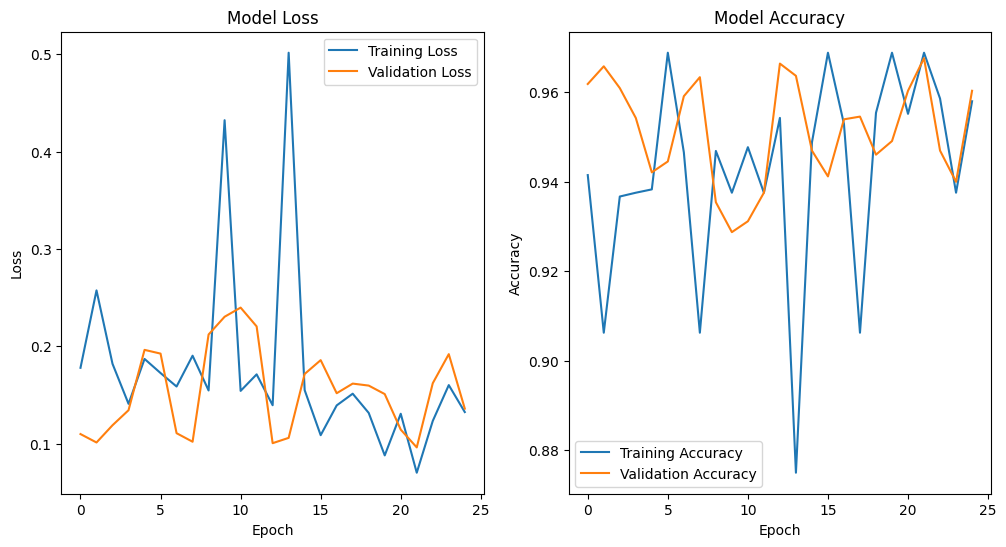

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(historyCNN.history['loss'], label='Training Loss')
plt.plot(historyCNN.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(historyCNN.history['accuracy'], label='Training Accuracy')
plt.plot(historyCNN.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
Predicted label: Pepper__bell___Bacterial_spot


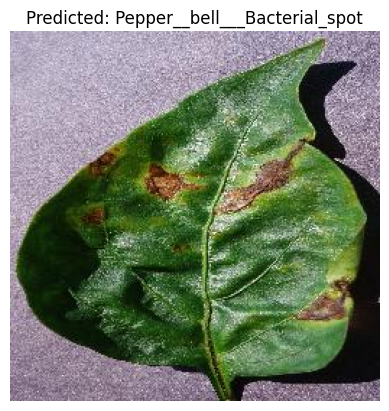

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load model
model = load_model("PlantVillage1.h5")

# Image path
img_path = "D:\\elevate labs\\Plant Disease Detection from Leaf Images\\0fcbdf76-fcc4-4271-986a-9466a784d404___JR_B.Spot 3374.JPG"

# Load and preprocess image
img_width, img_height = 224, 224  # Change to your model's input size
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Prediction
class_probabilities = model.predict(img_array)
predicted_label = np.argmax(class_probabilities)

class_labels = [
    'Pepper__bell___Bacterial_spot','Pepper__bell___healthy',
    'Potato___Early_blight','Potato___Late_blight','Potato___healthy',
    'Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_Late_blight',
    'Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot',
    'Tomato_Spider_mites_Two_spotted_spider_mite','Tomato__Target_Spot',
    'Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato__Tomato_mosaic_virus',
    'Tomato_healthy'
]

predicted_label_name = class_labels[predicted_label]

# Print result
print("Predicted label:", predicted_label_name)

# Display image with predicted label
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {predicted_label_name}")
plt.axis("off")
plt.show()
